In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/2022dataset/heart_2022_no_nans.csv'

In [ ]:
data_update = pd.read_csv(file_path)
data_update

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [ ]:
data_update.duplicated().sum()

9

In [ ]:
duplicate_obs = data_update[data_update.duplicated(keep=False)]
duplicate_obs

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
5294,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
5702,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
86986,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87371,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87555,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
88402,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
136874,New Jersey,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.63,80.74,30.55,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
137645,New Jersey,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.63,80.74,30.55,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
174878,Rhode Island,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.57,68.04,27.44,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
174923,Rhode Island,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.57,68.04,27.44,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
data_copy = data_update.copy()
data_copy = data_update.drop_duplicates()
data_copy

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [ ]:
data_copy1 = data_copy.copy()
data_copy2 = data_copy.copy()

In [ ]:
numerical_cols = data_copy.select_dtypes(include=['float64','number']).columns
numerical_data = data_copy[numerical_cols]
numerical_data

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,4.0,0.0,9.0,1.60,71.67,27.99
1,0.0,0.0,6.0,1.78,95.25,30.13
2,0.0,0.0,8.0,1.85,108.86,31.66
3,5.0,0.0,9.0,1.70,90.72,31.32
4,3.0,15.0,5.0,1.55,79.38,33.07
...,...,...,...,...,...,...
246017,0.0,0.0,6.0,1.78,102.06,32.28
246018,0.0,7.0,7.0,1.93,90.72,24.34
246019,0.0,15.0,7.0,1.68,83.91,29.86
246020,2.0,2.0,7.0,1.70,83.01,28.66


In [ ]:
categorical_cols = data_copy.select_dtypes(include=['object','category']).columns

In [ ]:
data_copy1['HeartConditionBinary'] = ((data_copy1['HadHeartAttack'] == 'Yes') | (data_copy1['HadAngina'] == 'Yes')).astype(int)
data_copy1

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,0
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,0
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,0
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,0
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,0


In [ ]:
data_copy1 = data_copy1.drop(['HadHeartAttack','HadAngina'],axis=1)

In [ ]:
nominal_features = ['State', 'RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos','RemovedTeeth','SmokerStatus','ECigaretteUsage','HadDiabetes']
binary_features = [
     'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'PhysicalActivities', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan'
]
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'AgeCategory']

In [ ]:
data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(data_copy1[nominal_features]),
    columns=one_hot_encoder.get_feature_names_out(nominal_features),
    index=data_copy1.index  # Align indices with the original DataFrame
)

binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)


ordinal_mappings = {
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'LastCheckupTime': [
        '5 or more years ago',
        'Within past 5 years (2 years but less than 5 years ago)',
        'Within past 2 years (1 year but less than 2 years ago)',
        'Within past year (anytime less than 12 months ago)'
    ],
    'AgeCategory':[
        'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59','Age 60 to 64', 'Age 65 to 69'
         ,'Age 70 to 74','Age 75 to 79','Age 80 or older'
    ]
}

ordinal_encoded = data_copy1[ordinal_features].replace({
    col: {val: i for i, val in enumerate(vals)} for col, vals in ordinal_mappings.items()
})

<ipython-input-14-f83d4d9ba490>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})
<ipython-input-14-f83d4d9ba490>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-14-f83d4d9ba490>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`.

In [ ]:
processed_data1 = pd.concat([nominal_encoded, binary_encoded, ordinal_encoded,numerical_data], axis=1)
processed_data1['HeartConditionBinary'] = data_copy1['HeartConditionBinary'].values

In [ ]:
X = processed_data1.drop(columns=['HeartConditionBinary'])
y = processed_data1['HeartConditionBinary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
X_train

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,ChestScan,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
29612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,4,3,10,1.0,0.0,7.0,1.70,63.50,21.93
49482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,3,5,7.0,14.0,7.0,1.68,91.63,32.60
59306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,3,1,0.0,0.0,8.0,1.60,74.84,29.23
83602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,3,8,3.0,0.0,7.0,1.68,46.27,16.46
75627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,3,10,0.0,0.0,4.0,1.75,79.38,25.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,3,9,0.0,0.0,8.0,1.80,99.79,30.68
181573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,3,5,0.0,0.0,8.0,1.68,81.65,29.05
94738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4,3,10,0.0,0.0,8.0,1.70,56.70,19.58
236678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,3,9,0.0,0.0,7.0,1.83,81.65,24.41


In [ ]:
X_test

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,ChestScan,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
181690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,3,9,21.0,0.0,7.0,1.57,67.59,27.25
124753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,3,10,21.0,0.0,7.0,1.70,72.57,25.06
25392,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,4,3,8,0.0,5.0,6.0,1.47,68.04,31.35
159199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,3,2,30.0,5.0,8.0,1.68,63.50,22.60
226170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,2,0,0.0,0.0,7.0,1.78,81.65,25.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15859,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,3,3,6,1.0,20.0,7.0,1.70,71.21,24.59
108237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,1,2,2.0,2.0,8.0,1.68,68.04,24.21
58674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,3,7,0.0,0.0,8.0,1.68,136.08,48.42
59484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,3,8,3.0,0.0,8.0,1.78,72.57,22.96


In [ ]:
!pip install shap
import shap
import random


IR = 10.38
lr = LogisticRegression(penalty='l2', solver='saga', C=0.01946881988503488, max_iter=40, class_weight={1: IR, 0: 1})
lr.fit(X_train, y_train)

explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_test)


#feature importance plot
shap_importance = np.abs(shap_values).mean(axis=0)

# Get indices of the top 15 most important features
top_15_indices = np.argsort(shap_importance)[-15:]

# Extract SHAP values and feature names for the top 15 features
shap_values_top15 = shap_values[:, top_15_indices]
X_test_top15 = X_test.iloc[:, top_15_indices]
feature_names_top15 = X_test.columns[top_15_indices]

shap_exp_top15 = shap.Explanation(
    values=shap_values_top15,
    base_values=explainer.expected_value,
    data=X_test_top15,
    feature_names=feature_names_top15
)

shap.plots.bar(shap_exp_top15, max_display=15)

#beeswarm plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, max_display=15)

#waterfall force plot
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test.iloc[0]))


In [ ]:
!pip install shap
import shap
import random


In [ ]:
IR = 10.38
lr = LogisticRegression(penalty='l2', solver='saga', C=0.01946881988503488, max_iter=40, class_weight={1: IR, 0: 1})
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01946881988503488, class_weight={0: 1, 1: 10.38},
                   max_iter=40, solver='saga')

In [ ]:
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7548523464016422


In [ ]:
explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_test)

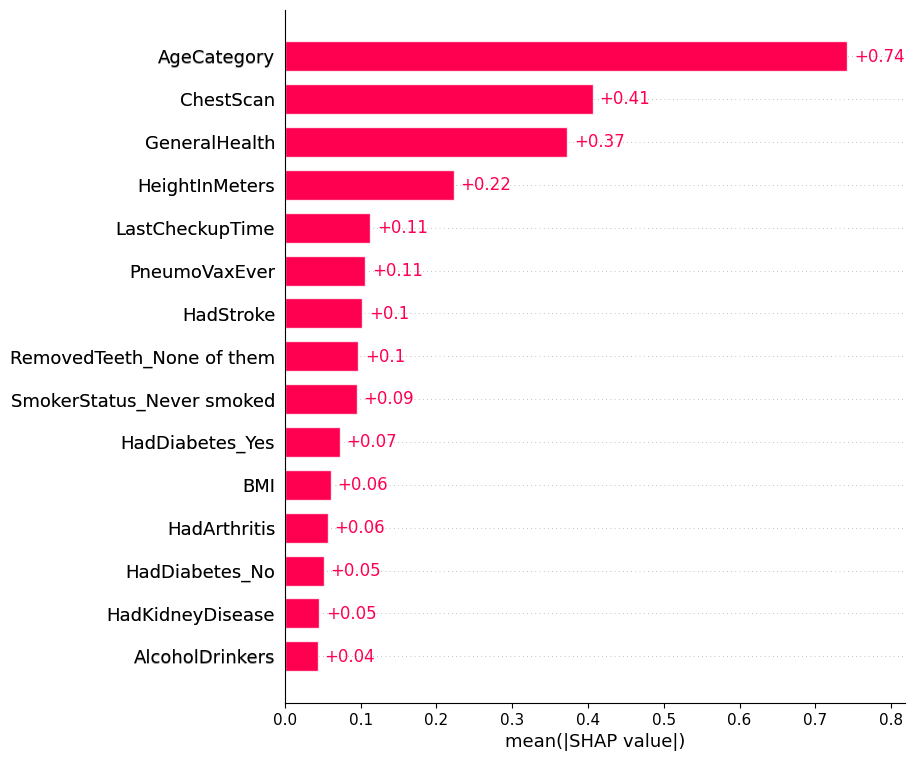

In [ ]:
shap_importance = np.abs(shap_values).mean(axis=0)

# Get indices of the top 15 most important features
top_15_indices = np.argsort(shap_importance)[-15:]

# Extract SHAP values and feature names for the top 15 features
shap_values_top15 = shap_values[:, top_15_indices]
X_test_top15 = X_test.iloc[:, top_15_indices]
feature_names_top15 = X_test.columns[top_15_indices]

# Manually create the SHAP Explanation object for exactly 15 features
shap_exp_top15 = shap.Explanation(
    values=shap_values_top15,
    base_values=explainer.expected_value,
    data=X_test_top15,
    feature_names=feature_names_top15
)

# Generate the feature importance bar plot for exactly 15 features
shap.plots.bar(shap_exp_top15, max_display=15)  # Ensures all 15 features are shown

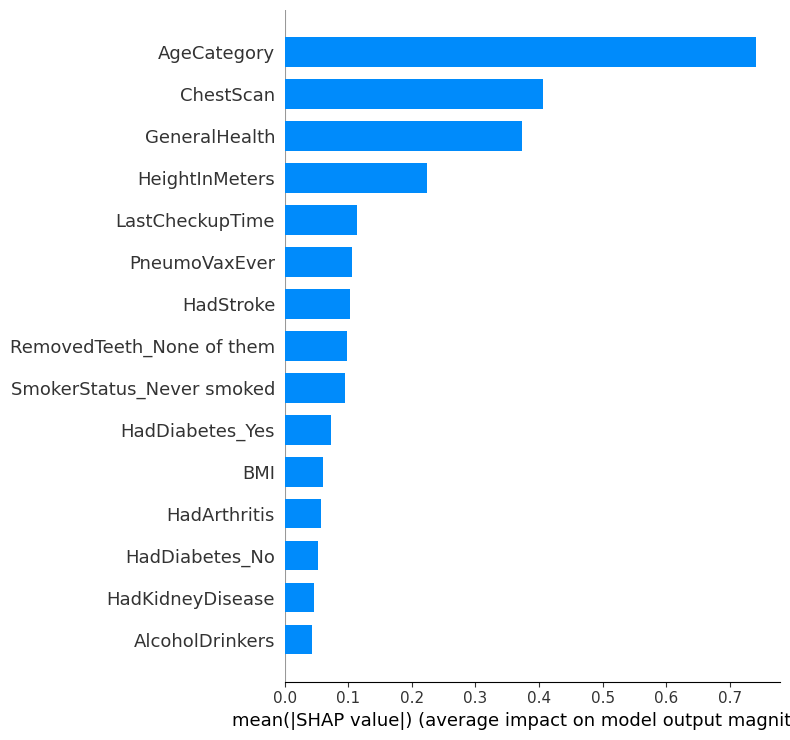

In [ ]:
shap_importance = np.abs(shap_values).mean(axis=0)

# Get indices of top 15 features
top_15_indices = np.argsort(shap_importance)[-15:]

# Plot feature importance bar plot for the top 15 features
shap.summary_plot(shap_values[:, top_15_indices], X_test.iloc[:, top_15_indices],
                  feature_names=X.columns[top_15_indices], plot_type="bar")

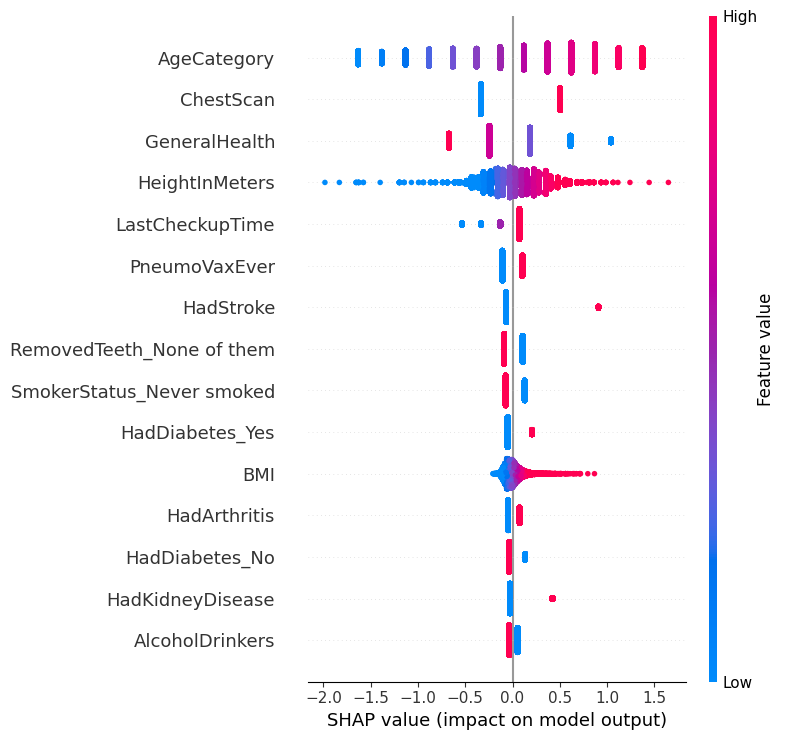

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns, max_display=15)

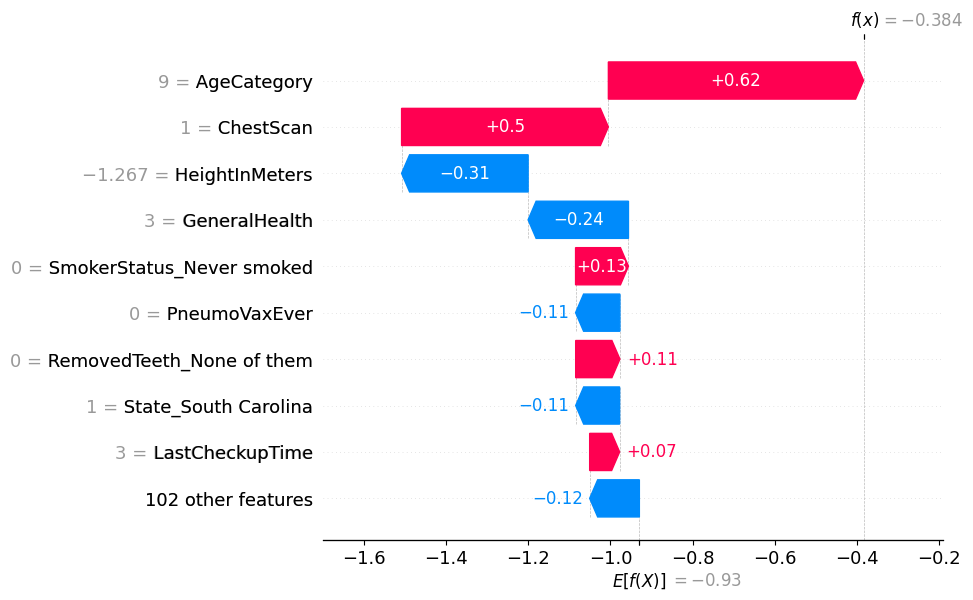

In [ ]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test.iloc[0]))

In [ ]:
best_rf_params1  = {'n_estimators': 25,'max_depth': 20,'min_samples_split':4,'min_samples_leaf':6}
IR = 10.38
class_weights1 = {0: (1/IR), 1:1}


In [ ]:
random_forest_model1 = RandomForestClassifier(**best_rf_params1, class_weight=class_weights1, random_state=10, n_jobs=-1)
random_forest_model1.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.09633911368015413, 1: 1},
                       max_depth=20, min_samples_leaf=6, min_samples_split=4,
                       n_estimators=25, n_jobs=-1, random_state=10)

In [ ]:
y_pred1 = random_forest_model1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90     44786
           1       0.28      0.63      0.39      4417

    accuracy                           0.82     49203
   macro avg       0.62      0.74      0.64     49203
weighted avg       0.90      0.82      0.85     49203

Confusion Matrix:
 [[37787  6999]
 [ 1647  2770]]


In [ ]:
'''explainer1 = shap.TreeExplainer(random_forest_model1)
shap_values = explainer1.shap_values(X_test)'''

#LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a10861388e51654252e5c8b7a810589af4b3c50d92382d24f4ed66f93845c1c3
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    training_labels=y_train.values,
    mode='classification',
    class_names=random_forest_model1.classes_,
    feature_names=X_train.columns,
    discretize_continuous=True
)

In [ ]:
instance_idx = 5
instance = X_test.iloc[instance_idx].values.reshape(1, -1)

explanation = explainer.explain_instance(instance[0], random_forest_model1.predict_proba)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
explanation.show_in_notebook(show_table=True, show_all=False)

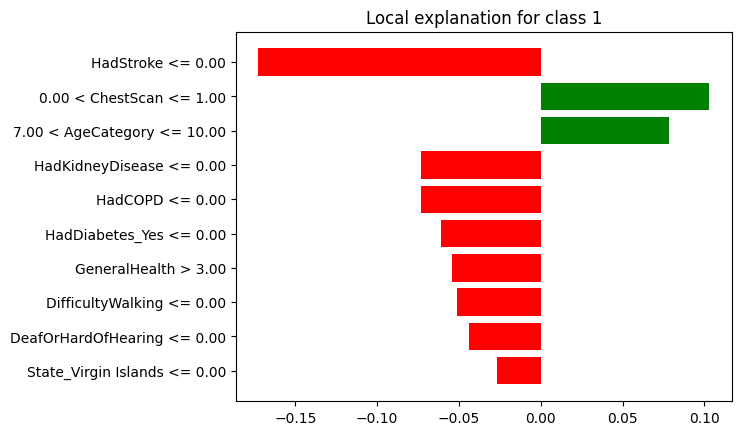

In [ ]:
fig = explanation.as_pyplot_figure()
plt.show()

# DALEX


In [ ]:
!pip install dalex


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042899 sha256=d8dafdb67a5da6eb4125f0e980e1329bdb94f57bae4b9c0c8c0d7ee12e6f7168
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex


In [ ]:
import dalex as dx

Preparation of a new explainer is initiated

  -> data              : 196810 rows 111 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 196810 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7cc9252ee340> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000587, mean = 0.35, max = 0.997
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.992, mean = -0.263, max = 0.986
  -> model_info        : package sklearn

A new explainer has been created!


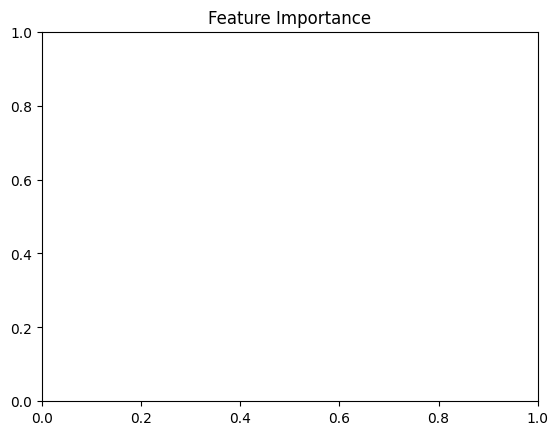

In [ ]:
explainer = dx.Explainer(lr, X_train, y_train)
feature_importance = explainer.model_parts()
feature_importance.plot()
plt.title('Feature Importance')
plt.show()

In [ ]:
print(X_train['BMI'])

29612     21.93
49482     32.60
59306     29.23
83602     16.46
75627     25.84
          ...  
93556     30.68
181573    29.05
94738     19.58
236678    24.41
83210     33.75
Name: BMI, Length: 196810, dtype: float64


In [ ]:
print(X_train['BMI'].describe())

count    196810.000000
mean         28.670532
std           6.520065
min          12.110000
25%          24.240000
50%          27.460000
75%          31.890000
max          97.650000
Name: BMI, dtype: float64


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00, 25.69it/s]


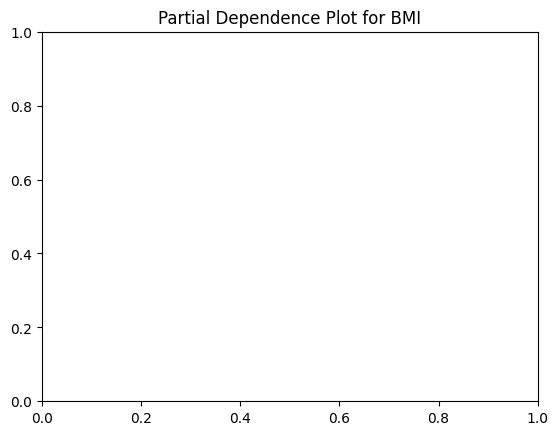

In [ ]:
pdp = explainer.model_profile(variables="BMI")

# Plot the PDP
pdp.plot()
plt.title('Partial Dependence Plot for BMI')
plt.show()

In [ ]:
X_test

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,ChestScan,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
181690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,3,9,21.0,0.0,7.0,1.57,67.59,27.25
124753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,3,10,21.0,0.0,7.0,1.70,72.57,25.06
25392,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,4,3,8,0.0,5.0,6.0,1.47,68.04,31.35
159199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,3,2,30.0,5.0,8.0,1.68,63.50,22.60
226170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,2,0,0.0,0.0,7.0,1.78,81.65,25.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15859,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,3,3,6,1.0,20.0,7.0,1.70,71.21,24.59
108237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,1,2,2.0,2.0,8.0,1.68,68.04,24.21
58674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,3,7,0.0,0.0,8.0,1.68,136.08,48.42
59484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,3,8,3.0,0.0,8.0,1.78,72.57,22.96


Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.    0.12  0.24 ... 11.76 11.88 12.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00, 29.02it/s]


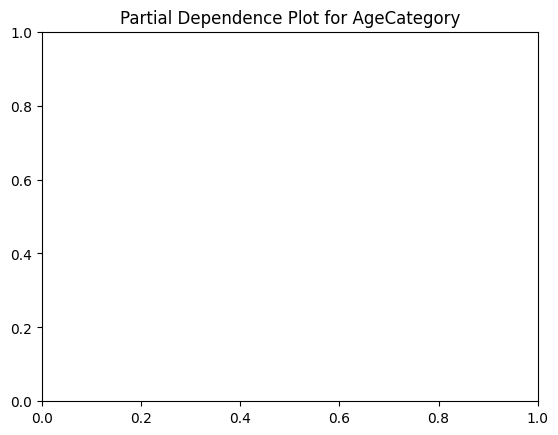

In [ ]:
pdp = explainer.model_profile(variables="AgeCategory")

# Plot the PDP
pdp.plot()
plt.title('Partial Dependence Plot for AgeCategory')
plt.show()

Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.01 0.02 ... 0.98 0.99 1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00, 25.00it/s]


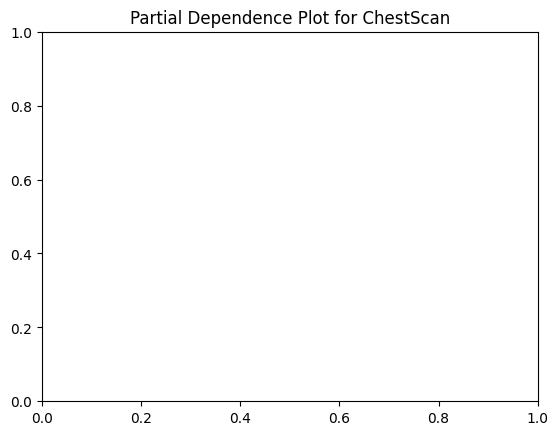

In [ ]:
pdp = explainer.model_profile(variables="ChestScan")

# Plot the PDP
pdp.plot()
plt.title('Partial Dependence Plot for ChestScan')
plt.show()

Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.04 0.08 ... 3.92 3.96 4.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00, 28.83it/s]


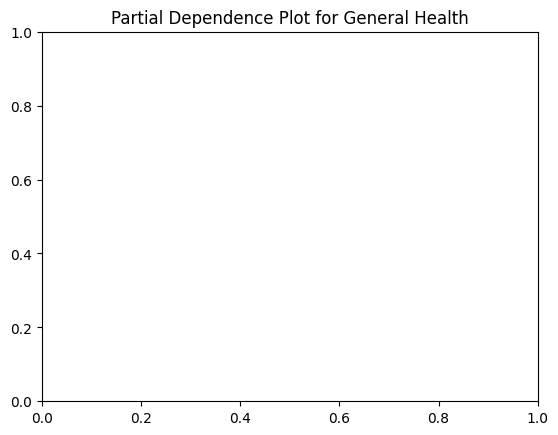

In [ ]:
pdp = explainer.model_profile(variables="GeneralHealth")

# Plot the PDP
pdp.plot()
plt.title('Partial Dependence Plot for General Health')
plt.show()